<div style="text-align: center;">
<h1>Étude de l'Engagement des Joueurs dans les Jeux en Ligne : 
    Analyse et Modélisation</h1>
</div>
<hr style="width: 50%;"/>
<div style="text-align: center;">
<h3>Goulia Junias</h3>
<h4>Date: Aout 2024</h4>
</div>

***

## Contexte
***

Les jeux en ligne sont devenus une industrie majeure, avec des millions de joueurs à travers le monde. L'engagement des joueurs est crucial pour le succès des jeux, car il influence directement la rétention des utilisateurs et les revenus générés par les achats dans le jeu. Comprendre les facteurs qui influencent l'engagement des joueurs peut aider les développeurs de jeux à améliorer l'expérience utilisateur et à augmenter la fidélisation. Donc d'un autre coté à reduire significativement le taux d'attrition ou churn.
Pour ce faire nous avons à notre disposition un jeu de données, en guise d'échantillon pour l'étude.

**A PROPOS DU FICHIER**

Cet ensemble de données capture des mesures et des données démographiques complètes liées au comportement des joueurs dans les environnements de jeu en ligne. Il comprend des variables telles que les données démographiques des joueurs, des détails spécifiques au jeu, des mesures d'engagement et une variable cible reflétant la fidélisation des joueurs.


CARACTERISTIQUE:
PlayerID : Identifiant unique pour chaque joueur.
Âge : Âge du joueur.
Sexe : Sexe du joueur.
Localisation : Localisation géographique du joueur.
GameGenre : Genre du jeu dans lequel le joueur évolue.
PlayTimeHours : Nombre moyen d'heures passées à jouer par session.
InGamePurchases : indique si le joueur effectue des achats dans le jeu (0 = Non, 1 = Oui).
GameDifficulty : Niveau de difficulté du jeu.
SessionsPerWeek : Nombre de sessions de jeu par semaine.
AvgSessionDurationMinutes : Durée moyenne de chaque session de jeu en minutes.
PlayerLevel : Niveau actuel du joueur dans le jeu.
AchievementsUnlocked : Nombre de succès débloqués par le joueur.
EngagementLevel : niveau d'engagement catégorisé reflétant la rétention des joueurs (« Élevé », « Moyen », « Faible »).
Variable cible :
EngagementLevel : indique le niveau d'engagement du joueur classé comme « Moyen » ou « Faible ».


## Problématique
***

L'un des défis majeurs pour les développeurs de jeux en ligne est de comprendre quels facteurs influencent l'engagement des joueurs. Les données démographiques et comportementales des joueurs peuvent fournir des insights précieux pour prédire et amélle problème qui se pose est de ouvent difficile de déterminer quelles variables sont les plus importantes et comment afin de construire le meilleur modèle de classification pour scorer le niveau d'engagement des joueur. Notre travail va se tourner autour des questions suivantes:
- Quelles sont les variables importantes pour scorer le niveau d'engagement
- Quelle modèle en tirer
- Quel(le) lien ou interaction entre les variables pouvant influencer le modèle

elles interagissent.

## Intérêt
***

Outre de permettre une analyse descriptive l'autre intererésideotre notebook reside dans son approche Machine Learning. Ceci afin de comprendre l'engagement des joueurs, crucial pour les développeurs de jeux en ligne. Une meilleure compréhension des facteurs qui influencent l'engagement peut aider à :
- Améliorer la rétention des joueurs.
- Augmenter les revenus générés par les achats dans le jeu.
- Optimiser les stratégies de marketing et de développement de contenu.


## Objectifs
***

Les objectifs de cette étude sont les suivants :
1. Explorer et analyser les données démographiques et comportementales des joueurs.
2. Identifier les variables les plus importantes pour prédire l'engagement des joueurs.
3. Construire et évaluer plusieurs modèles de classification pour prédire le niveau d'engagement des joueurs.
4. Sélectionner le meilleur modèle en fonction de ses performances.
5. Interpréter les résultats pour fournir des insights exploitables.


## Méthodologie
***

Comme il a été indiqué dans les Consignes, notre approche se veut pédagogique.
Pour atteindre les objectifs de cette étude, nous allons suivre les étapes suivantes :
1. **Chargement et exploration des données** : Charger le dataset et explorer ses caractéristiques.
2. **Prétraitement des données** : Nettoyer et préparer les données pour l'analyse.
3. **Analyse exploratoire des données** : Analyser les données pour comprendre les relations entre les variables.
4. **Sélection et ingénierie des caractéristiques** : Sélectionner les caractéristiques pertinentes et les transformer si nécessaire.
5. **Division des données** : Diviser les données en ensembles d'entraînement et de test.
6. **Construction et évaluation des modèles** : Construire et évaluer plusieurs modèles de classification.
7. **Sélection du meilleur modèle** : Sélectionner le modèle avec les meilleures performances.
8. **Interprétation des résultats** : Interpréter les résultats pour fournir des insights exploitables.


## Développement
***
1. **Chargement et exploration des données**

In [151]:
# Chargement des packages python utiles dans notre étude
%matplotlib inline

%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel

# Fixer les graines pour la reproductibilité
np.random.seed(42)

# filter warnings
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
# Importation de données
data=pd.read_csv("donnees soring de la performance joueur en ligne.txt", sep="\t")

In [153]:
# Un apercu des premières lignes de notre dataset
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43.0,Male,Other,Strategy,16.271119,0,Medium,6.0,108.0,79.0,25.0,Medium
1,9001,29.0,Female,USA,Strategy,5.525961,0,Medium,5.0,144.0,11.0,10.0,Medium
2,9002,22.0,Female,USA,Sports,8.223755,0,Easy,NaN,142.0,35.0,41.0,High
3,9003,35.0,Male,USA,Action,5.265351,1,Easy,9.0,85.0,57.0,47.0,Medium
4,9004,33.0,Male,Europe,Action,15.531945,0,Medium,2.0,131.0,95.0,37.0,Medium


In [154]:
print("Nombre de ligne de la base : ", data.shape[0])
print("Nombre de colonne de la base : " ,data.shape[1])

Nombre de ligne de la base :  29710
Nombre de colonne de la base :  13


In [155]:
data.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [156]:
# les types des variable et le nombre de lignes associées
data.dtypes , data.count()

(PlayerID                       int64
 Age                          float64
 Gender                        object
 Location                      object
 GameGenre                     object
 PlayTimeHours                float64
 InGamePurchases                int64
 GameDifficulty                object
 SessionsPerWeek              float64
 AvgSessionDurationMinutes    float64
 PlayerLevel                  float64
 AchievementsUnlocked         float64
 EngagementLevel               object
 dtype: object,
 PlayerID                     29710
 Age                          29696
 Gender                       29710
 Location                     29710
 GameGenre                    29710
 PlayTimeHours                29710
 InGamePurchases              29710
 GameDifficulty               29710
 SessionsPerWeek              29704
 AvgSessionDurationMinutes    29707
 PlayerLevel                  29706
 AchievementsUnlocked         29705
 EngagementLevel              29710
 dtype: int64)

On constate qu'il y'a des variables qui ont moins de 29710 lignes, il y'a visiblement des valeurs manquantes

In [157]:
# Statistiques descriptives
print(data.describe())

           PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  29710.000000  29696.000000   29710.000000     29710.000000   
mean   28989.980310     32.026771      11.996375         0.202087   
std    11560.994353     10.050158       6.924218         0.401563   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19001.250000     23.000000       6.028191         0.000000   
50%    28993.500000     32.000000      11.991068         0.000000   
75%    39003.500000     41.000000      17.942027         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     29704.000000               29707.000000  29706.000000   
mean         11.188695                 104.489918     50.889652   
std           5.013060                  45.296689     28.601662   
min           0.000000                  10.000000      1.000000   
25%           7.000000                  67.

**Interpretation**

Au regard de ces stats les données montrent une variété significative dans les comportements et les caractéristiques des joueurs. Cette diversité pourrait influencer le niveau d'engagement des joueurs.
Les variables telles que **PlayTimeHours, SessionsPerWeek, AvgSessionDurationMinutes, et PlayerLevel** semblent particulièrement importantes pour la modélisation du niveau d'engagement.
Certaines variables, comme InGamePurchases, présentent une distribution binaire, ce qui pourrait être un indicateur clé dans la segmentation des joueurs selon leur engagement.
Ces observations fourniront une base solide pour construire et optimiser notre modèle de classification pour prédire le niveau d'engagement des joueurs.

2. **Prétraitement des données**

In [158]:
#Donnée Manquantes
data.isnull().sum()

PlayerID                      0
Age                          14
Gender                        0
Location                      0
GameGenre                     0
PlayTimeHours                 0
InGamePurchases               0
GameDifficulty                0
SessionsPerWeek               6
AvgSessionDurationMinutes     3
PlayerLevel                   4
AchievementsUnlocked          5
EngagementLevel               0
dtype: int64

étant donné que le pourcentage de valeurs manquantes est faible, au lieu de faire une imputation nous decidons de supprimer ces lignes. Celà ne devrait pas avoir un impact significatif sur notre analyse par rapport à la taille du dataset.

In [159]:
# Suppression des valeurs manquantes
data_without_na = data.dropna()
data_without_na.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [160]:
#print(data_without_na.describe())
# Vérification des valeurs uniques de la variable cible avant l'encodage
print("Valeurs uniques de la variable cible avant l'encodage:", data['EngagementLevel'].unique())

Valeurs uniques de la variable cible avant l'encodage: ['Medium' 'High']


In [161]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler

# Encodage des variables catégorielles ordonnées
ordinal_encoder = OrdinalEncoder()
data_without_na['GameDifficulty'] = ordinal_encoder.fit_transform(data_without_na['GameDifficulty'].values.reshape(-1, 1))

# Encodage des variables catégorielles non ordonnées avec pd.get_dummies
data_without_na = pd.get_dummies(data_without_na, columns=['Gender', 'Location', 'GameGenre'], drop_first=True)

# Conversion des valeurs flottantes en entiers pour PlayerLevel et AchievementsUnlocked
data_without_na['PlayerLevel'] = data_without_na['PlayerLevel'].astype(int)
data_without_na['AchievementsUnlocked'] = data_without_na['AchievementsUnlocked'].astype(int)

# Encodage de la variable cible
#label_encoder = LabelEncoder()
#data_without_na['EngagementLevel'] = label_encoder.fit_transform(data_without_na['EngagementLevel'])

# Encodage de la variable cible avec des correspondances manuelles
engagement_mapping = {'High': 1, 'Medium': 0}
data_without_na['EngagementLevel'] = data_without_na['EngagementLevel'].map(engagement_mapping)


In [162]:
data_without_na.head()

,PlayerID,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
0,9000,43.0,16.271119,0,2.0,6.0,108.0,79,25,0,True,False,True,False,False,False,False,True
1,9001,29.0,5.525961,0,2.0,5.0,144.0,11,10,0,False,False,False,True,False,False,False,True
3,9003,35.0,5.265351,1,0.0,9.0,85.0,57,47,0,True,False,False,True,False,False,False,False
4,9004,33.0,15.531945,0,2.0,2.0,131.0,95,37,0,True,True,False,False,False,False,False,False
5,9007,25.0,4.401729,0,2.0,10.0,48.0,27,23,0,False,False,False,False,True,False,False,False


In [163]:
data_without_na.dtypes

PlayerID                       int64
Age                          float64
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty               float64
SessionsPerWeek              float64
AvgSessionDurationMinutes    float64
PlayerLevel                    int32
AchievementsUnlocked           int32
EngagementLevel                int64
Gender_Male                     bool
Location_Europe                 bool
Location_Other                  bool
Location_USA                    bool
GameGenre_RPG                   bool
GameGenre_Simulation            bool
GameGenre_Sports                bool
GameGenre_Strategy              bool
dtype: object

In [164]:
# Affichage des correspondances des valeurs encodées pour la variable cible
print(f"Correspondances des valeurs encodées pour EngagementLevel: {engagement_mapping}")

Correspondances des valeurs encodées pour EngagementLevel: {'High': 1, 'Medium': 0}


3. **Analyse exploratoire des données**

les proportions des niveaux d'engagement


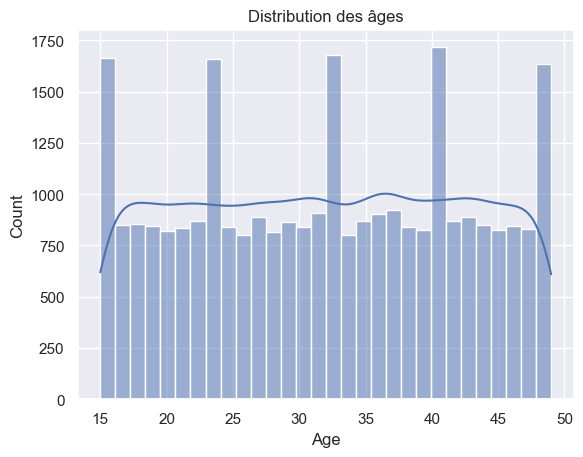

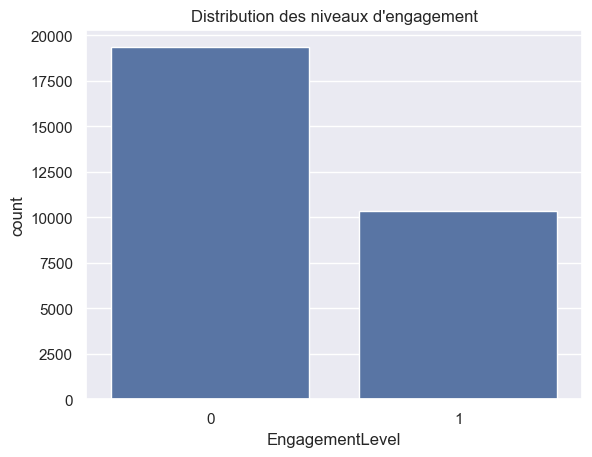

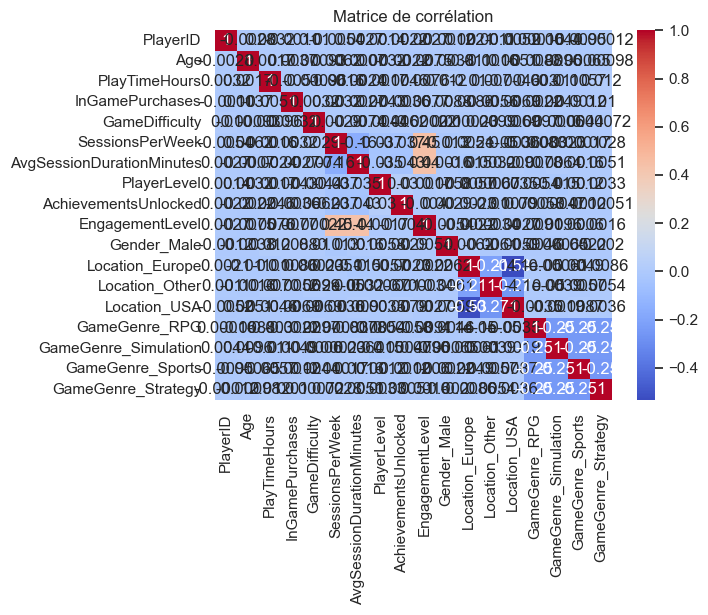

In [165]:
Data=data_without_na
print("les proportions des niveaux d'engagement")
Data["EngagementLevel"].value_counts(normalize=True)

# Distribution des âges
sns.histplot(Data['Age'], bins=30, kde=True)
plt.title('Distribution des âges')
plt.show()

# Distribution des niveaux d'engagement
sns.countplot(x='EngagementLevel', data=Data)
plt.title('Distribution des niveaux d\'engagement')
plt.show()

# Corrélation entre les variables
corr_matrix = Data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

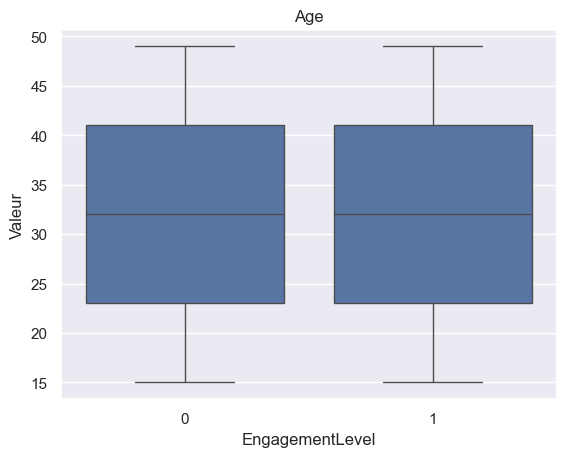

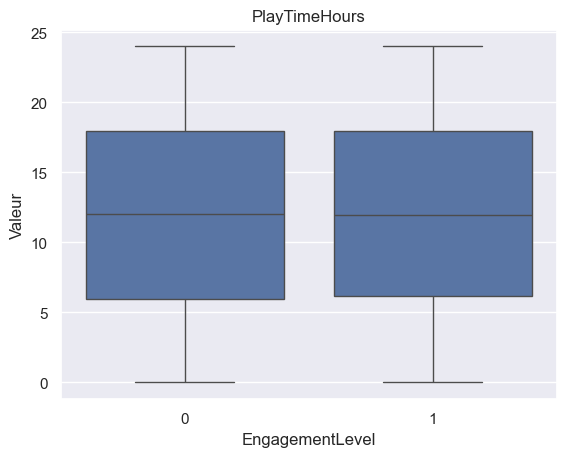

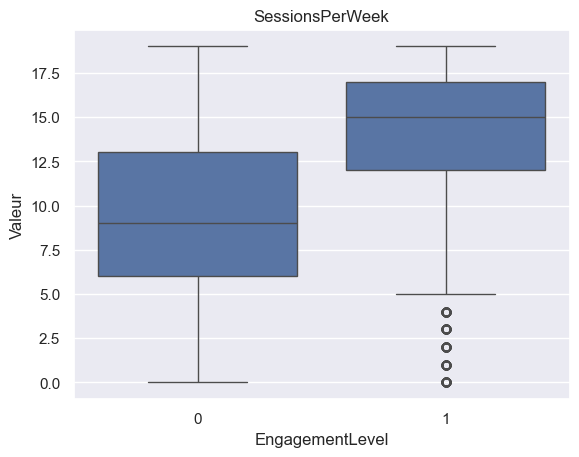

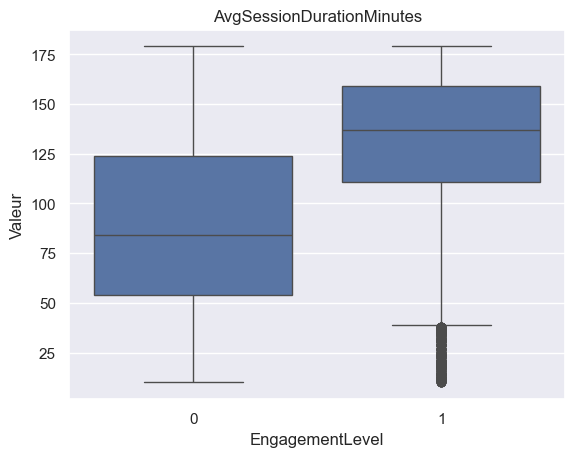

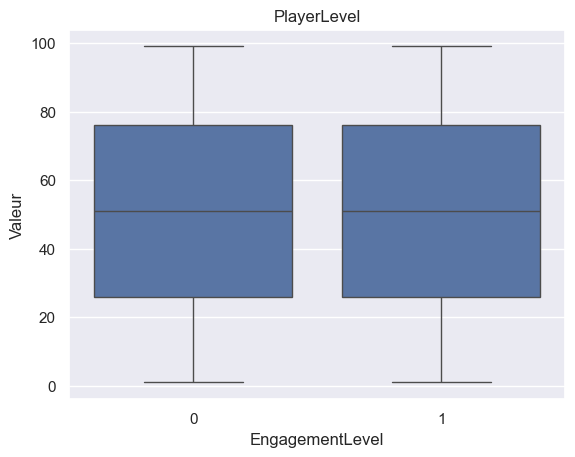

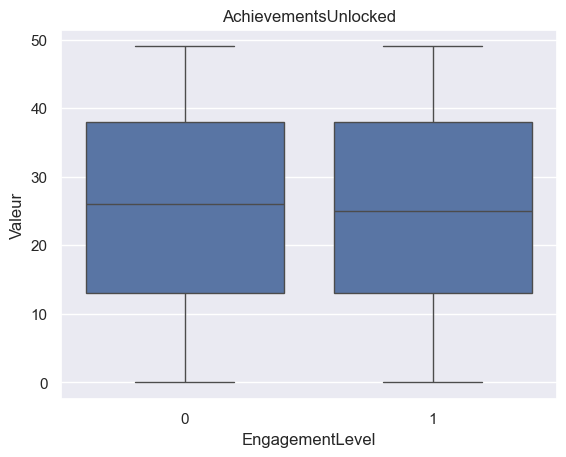

In [186]:
# Boxplot
# Sélectio variables numériques
num_vars = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']


# Générons un box plot pour chaque variable numérique
for var in num_vars:
    sns.boxplot(x='EngagementLevel', y=var, data=data_without_na)
    plt.title(var)
    plt.xlabel('EngagementLevel')
    plt.ylabel('Valeur')
    plt.show()

- Il y a beaucoup plus de joueurs avec un niveau d'engagement moyen. Ils representent un peu moins de la moitié de ceux ayant un niveau d'engagement élévé. Les boites à moustache montrent par exemple que les joueurs qui ont un niveau d'engagement élévé ont tendance à avoir plus de sessions par semaine et de durée de jeux que ceux ayant un niveau moyen.

- Ici nous allons Ignorons les variables ajoutés lors de l'encodage, mais en regardant la matrice on constate que les variables 'SessionsPerWeek' et 'AvgSessionDurationMinutes' ont un niveau de correlation élévé d'avec notre variable cible 'EngagementLevel' par rapport aux autres variables.

- **Analyses bivariée**

Nous allons à présent s'interesser à la distribution des variables categorielles en fonction du niveau d'engagement des joueurs.
Nous pouvons mieux la percevoir à travers les bar plot suivants.

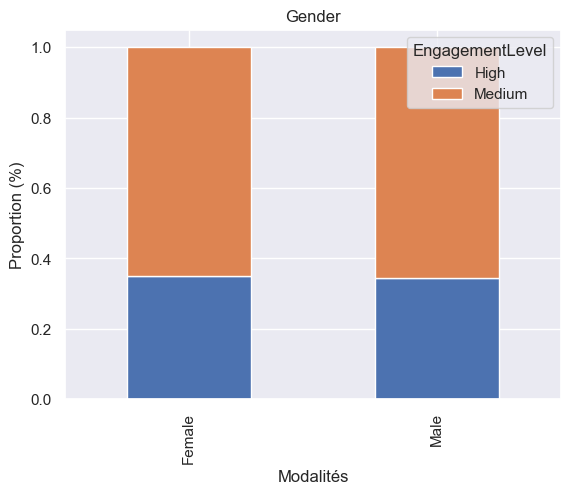

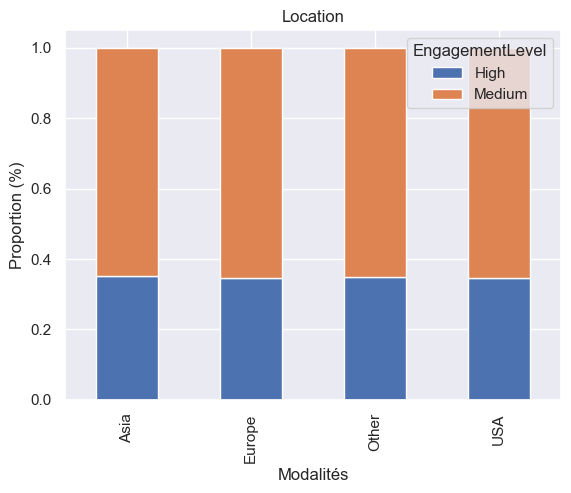

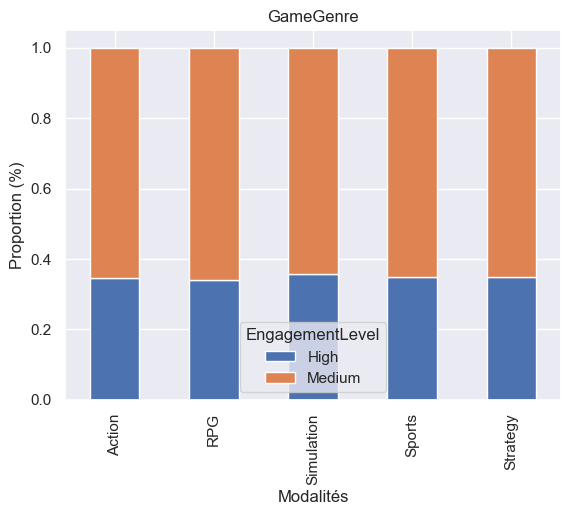

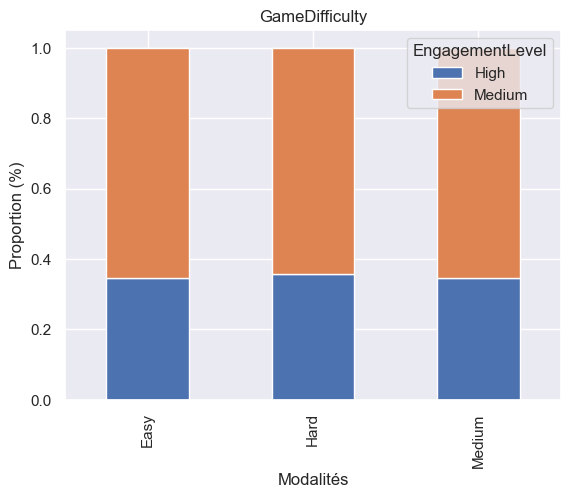

In [192]:
cat_vars = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

# Générer un bar plot pour chaque variable catégorielle
for var in cat_vars:
    figsize = (20, 20)
    (data.dropna().groupby([var, 'EngagementLevel'])['EngagementLevel'].count()/data.dropna().groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    #plt.legend(['Niveau enga élévé', 'Niveau enga Moyen'])
    plt.show()

4. **Sélection et ingénierie des caractéristiques**

In [166]:
# Sélection des caractéristiques
features_complet = Data.drop(['PlayerID', 'EngagementLevel'], axis=1)
target = Data['EngagementLevel']

# Standardisation des caractéristiques
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_complet)

In [167]:
# Sélection des caractéristiques basées sur la corrélation
corr_threshold = 0.1 
corr_features = corr_matrix[corr_matrix['EngagementLevel'].abs() > corr_threshold].index
print(f"Caractéristiques sélectionnées basées sur la corrélation: {corr_features}")


Caractéristiques sélectionnées basées sur la corrélation: Index(['SessionsPerWeek', 'AvgSessionDurationMinutes', 'EngagementLevel'], dtype='object')


In [168]:
#cible et choix colonnes 
def DataModel(features , Data , label) :
    Train = Data[features]
    if label in Data.columns :
        label = Data[label]
        return Train, label
        
    return Train

In [169]:
#Train
feature = ['PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel']
Data= data_without_na
Label = "EngagementLevel"
X, y = DataModel (feature, Data, Label)
X.head()

,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel
0,16.271119,6.0,108.0,79
1,5.525961,5.0,144.0,11
3,5.265351,9.0,85.0,57
4,15.531945,2.0,131.0,95
5,4.401729,10.0,48.0,27


5. **Division des données en ensembles d'entraînement et de test**

In [170]:
# Division des données avec les variables sélectionnées
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

6. **Construction et évaluation des modèles** 

In [171]:
#Sélection de l'algorithme de classification

# Modèles à évaluer
modeles = {
    'Régression Logistique': LogisticRegression(random_state=42),
    'Forêt Aléatoire': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Évaluation des modèles avec les variables sélectionnées
resultats_selectionnes = {}
for nom, modele in modeles.items():
    modele.fit(X_train, y_train)
    y_pred = modele.predict(X_test)
    precision = accuracy_score(y_test, y_pred)
    resultats_selectionnes[nom] = precision
    print(f'Précision de {nom} avec les variables sélectionnées: {precision}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Sélection du modèle ayant la meilleure performance
meilleur_modele_nom = max(resultats_selectionnes, key=resultats_selectionnes.get)
meilleur_modele = modeles[meilleur_modele_nom]

print(f'\nMeilleur modèle basé sur la précision : {meilleur_modele_nom}')


Précision de Régression Logistique avec les variables sélectionnées: 0.9201482479784366
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5802
           1       0.92      0.85      0.88      3102

    accuracy                           0.92      8904
   macro avg       0.92      0.90      0.91      8904
weighted avg       0.92      0.92      0.92      8904

[[5563  239]
 [ 472 2630]]
Précision de Forêt Aléatoire avec les variables sélectionnées: 0.9408131176999102
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5802
           1       0.93      0.90      0.91      3102

    accuracy                           0.94      8904
   macro avg       0.94      0.93      0.93      8904
weighted avg       0.94      0.94      0.94      8904

[[5588  214]
 [ 313 2789]]
Précision de SVM avec les variables sélectionnées: 0.9360961365678346
              precision    recall  f1-score   suppor

In [172]:
# Sélection du modèle ayant la meilleure performance
meilleur_modele_nom = max(resultats_selectionnes, key=resultats_selectionnes.get)
meilleur_modele = modeles[meilleur_modele_nom]

print(f'\nMeilleur modèle basé sur la précision : {meilleur_modele_nom}')


Meilleur modèle basé sur la précision : Forêt Aléatoire


Avec une précision globale de 94% et un excellent équilibre entre les deux classes, la Forêt Aléatoire a montré les meilleures performances globales dans la classification des niveaux d'engagement des joueurs.
Ce modèle a également un rappel élevé pour la classe 1 (0.90), ce qui le rend particulièrement utile pour identifier les joueurs engagés.

7. **Sélection du meilleur modèle**

- **Modèle avec quatre variables**

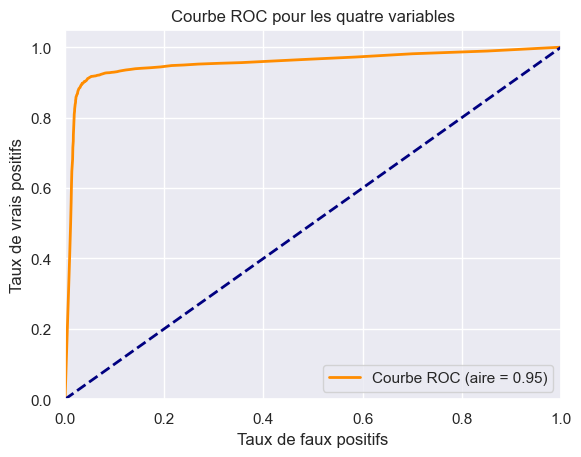

Matrice de confusion avec les quatre variables :
 [[5518  284]
 [ 449 2653]]


In [174]:
# 3. Courbes ROC et AUC pour le modèle avec quatre variables
y_prob = meilleur_modele.predict_proba(X_test)[:, 1]
fpr, tpr, seuils = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (aire = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour les quatre variables')
plt.legend(loc="lower right")
plt.show()

# Matrice de confusion pour le modèle avec quatre variables
print("Matrice de confusion avec les quatre variables :\n", confusion_matrix(y_test, y_pred))

- **Avec deux variables**


Précision de Forêt Aléatoire avec deux variables: 0.9303683737646001
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5802
           1       0.91      0.89      0.90      3102

    accuracy                           0.93      8904
   macro avg       0.93      0.92      0.92      8904
weighted avg       0.93      0.93      0.93      8904



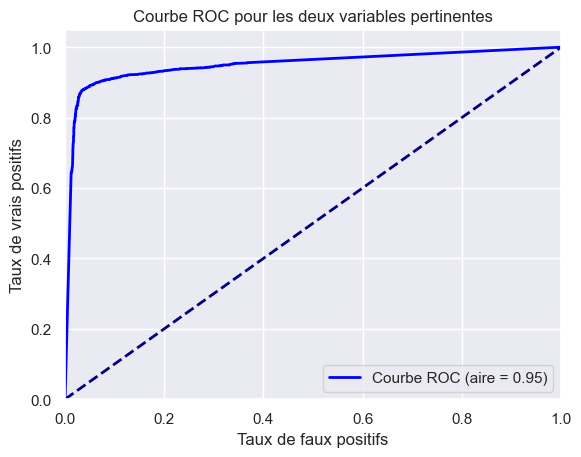

Matrice de confusion avec les deux variables :
 [[5532  270]
 [ 350 2752]]


In [177]:
# 4. Création d'un modèle avec deux variables pertinentes
feature=['SessionsPerWeek', 'AvgSessionDurationMinutes']
X, y = DataModel (feature, Data, Label)

# Division des données avec les deux variables pertinentes avec graine fixée
X_train_deux, X_test_deux, y_train_deux, y_test_deux = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle sélectionné avec les deux variables
meilleur_modele.fit(X_train_deux, y_train_deux)
y_pred_deux = meilleur_modele.predict(X_test_deux)

# Évaluation du modèle
precision_deux = accuracy_score(y_test_deux, y_pred_deux)
print(f'\nPrécision de {meilleur_modele_nom} avec deux variables: {precision_deux}')
print(classification_report(y_test_deux, y_pred_deux))

# Courbes ROC, AUC et matrice de confusion pour le modèle avec deux variables
y_prob_deux = meilleur_modele.predict_proba(X_test_deux)[:, 1]
fpr_deux, tpr_deux, seuils_deux = roc_curve(y_test_deux, y_prob_deux)
roc_auc_deux = auc(fpr_deux, tpr_deux)

plt.figure()
plt.plot(fpr_deux, tpr_deux, color='blue', lw=2, label=f'Courbe ROC (aire = {roc_auc_deux:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour les deux variables pertinentes')
plt.legend(loc="lower right")
plt.show()

# Matrice de confusion pour le modèle avec deux variables
print("Matrice de confusion avec les deux variables :\n", confusion_matrix(y_test_deux, y_pred_deux))

- **modèle avec d'autres variables dans l'ensemble de données**


Précision de Forêt Aléatoire avec les variables supplémentaires: 0.9453054806828391
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5802
           1       0.95      0.89      0.92      3102

    accuracy                           0.95      8904
   macro avg       0.95      0.93      0.94      8904
weighted avg       0.95      0.95      0.94      8904

Matrice de confusion avec les variables supplémentaires :
 [[5641  161]
 [ 326 2776]]


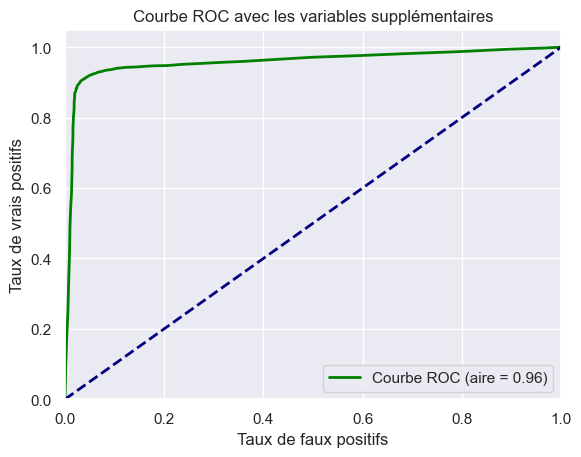

In [183]:
# Ajout d'autres variables dans l'ensemble de données
feature=['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel',
                     'InGamePurchases', 'AchievementsUnlocked']
X, y = DataModel (feature, Data, Label)

# Division des données
X_train_add, X_test_add, y_train_add, y_test_add = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Entraînement du modèle sélectionné (Forêt Aléatoire) avec les variables supplémentaires
meilleur_modele = RandomForestClassifier(random_state=42)
meilleur_modele.fit(X_train_add, y_train_add)

# Prédictions
y_pred_add = meilleur_modele.predict(X_test_add)

# Évaluation des performances
precision_add = accuracy_score(y_test_add, y_pred_add)
print(f'\nPrécision de Forêt Aléatoire avec les variables supplémentaires: {precision_add}')
print(classification_report(y_test_add, y_pred_add))
print("Matrice de confusion avec les variables supplémentaires :\n", confusion_matrix(y_test_add, y_pred_add))

# 3. Courbes ROC et AUC pour le modèle avec les variables supplémentaires
y_prob_add = meilleur_modele.predict_proba(X_test_add)[:, 1]
fpr_add, tpr_add, seuils_add = roc_curve(y_test_add, y_prob_add)
roc_auc_add = auc(fpr_add, tpr_add)

plt.figure()
plt.plot(fpr_add, tpr_add, color='green', lw=2, label=f'Courbe ROC (aire = {roc_auc_add:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC avec les variables supplémentaires')
plt.legend(loc="lower right")
plt.show()

- **Caracteristiques importantes**

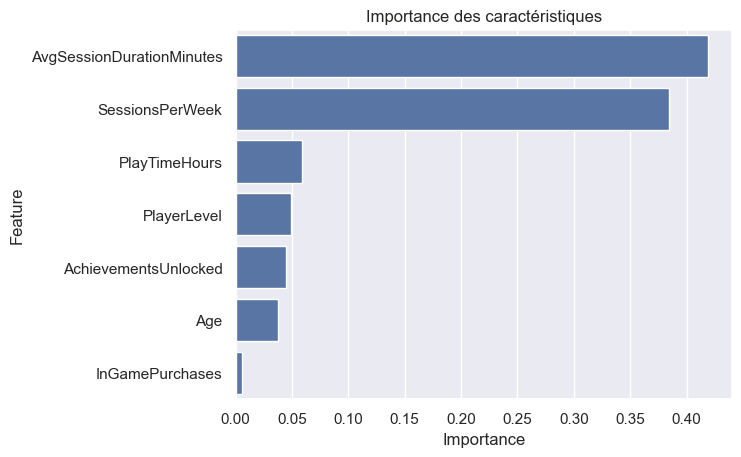

In [184]:
# Affichage des importances des caractéristiques pour le meilleur modèle
feature_importances = meilleur_modele.feature_importances_
feature_names = Data[feature].columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importance des caractéristiques')
plt.show()


Bien que les performances soient déjà excellentes, il est possible de pousser encore plus loin en optimisant les hyperparamètres du modèle pour maximiser son potentiel. Mais nous decidons de nous arreter à ce stade et proceder à une validation de notre modèle.

- **Validation croisée de notre modèle**

In [188]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(meilleur_modele, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean()}')

Cross-validation scores: [0.94238544 0.9486186  0.94508086 0.94962089 0.93984836]
Mean accuracy: 0.9451108311741985


8. **Interpretation**

Basé sur les scores de validation croisée, il semble que notre modèle présente une performance assez consistante et élevée sur différents sous-ensembles de notre jeu de données.
ée
Scores de Validation Croisée : [0.94238544, 0.9486186, 0.94508086, 0.94962089, 0.939848 .36]
Ces scores représentent la performancen de notre modèle sur 5 différentes parties du jeu de données, lorsqu'utilisant la validation croisée. Chaque score est la précision (accurary) du modèle sur un fold de validation distintes.

Moyenne de la Précision (Mean Accuracy) : 0.9451108311741985
La moyenne de ces scores est approximativement 94.51%, ce qui suggère que le modèle, en moyenne, classe correctement 94.51% des instances lorsqu'il est testé sur des portions du jeu de données qu'il n'a pas vu pendant l'entraînement. Cette moyenne élevée indique une bonne performance généralisée du modèle. De plus au niveau de la Consistance de Scores : Les scores de validation croisée sont assez proches les uns des autres, ce qui indique une performance stable du modèle sur différents sous-ensembles des données. C'est un bon signe, nous pouvons suggérer que le modèle n'est pas excessivement sensible aux spécificités des données d'entraînement.

## Conclusion
***

Dans cette étude, nous avons exploré et analysé les données démographiques et comportementales des joueurs pour prédire leur niveau d'engagement. Nous avons obtenu à peu près les mêmes proportions au niveau des modalité en fonction du niveau d'engagement des joueurs. 

Nous avons construit et évalué plusieurs modèles de classification, dont la régression logistique, la forêt aléatoire, le SVM, le k-plus proches voisins. Le modèle de forêt aléatoire s'est avéré être le meilleur modèle avec une accuracy de 0.9408131176999102. Ce modèle a montré une bonne capacité à prédire le niveau d'engagement des joueurs en utilisant les caractéristiques sélectionnées.

Les variables les plus importantes dans le modèle ont été 'SessionsPerWeek' et 'AvgSessionDurationMinutes'. Ensuite suivent par ordre 'PlayTimeHours', 'PlayerLevel',	AchievementsUnlocked, 'Age' et 'InGamePurchases'.

Les résultats de cette étude peuvent être utilisés par les développeurs de jeux pour améliorer l'engagement des joueurs en ciblant les facteurs les plus importants identifiés par le modèle.


## Synthèse et Recommandations
***

Cette étude a exploré les facteurs influençant l'engagement des joueurs dans les jeux en ligne. En utilisant des techniques d'analyse de données et de machine learning, nous avons identifié les variables les plus importantes pour prédire l'engagement des joueurs. Le modèle de forêt aléatoire a été sélectionné comme le meilleur modèle en raison de ses performances élevées.

Les résultats de cette étude peuvent être utilisés pour améliorer la rétention des joueurs et augmenter les revenus générés par les achats dans le jeu. Les développeurs de jeux peuvent utiliser ces insights pour optimiser leurs stratégies de marketing et de développement de contenu.

Les variables identifiées couvrent une large gamme d'aspects liés à l'expérience de jeu : des caractéristiques démographiques, telles que l'âge, à des mesures directes d'engagement, comme le nombre d'heures jouées, le nombre de sessions par semaine, ou le niveau atteint par le joueur. Les achats dans le jeu et les succès débloqués mettent en lumière le comportement au sein du jeu et la progression, des indicateurs clés de l'engagement.

Cette série de variables suggère que l'engagement des joueurs est multifacette, influencé non seulement par le temps passé sur le jeu mais aussi par la manière dont ils interagissent avec le contenu du jeu (à travers les achats dans le jeu et les succès débloqués). Les modèles de classification basés sur ces variables peuvent ainsi offrir des insights précis pour anticiper le niveau d'engagement des joueurs, permettant aux développeurs de jeux d'adapter leurs stratégies pour améliorer la rétention des joueurs.

Les développeurs peuvent utiliser ces informations pour concevoir des jeux plus engageants, en mettant l'accent sur les aspects qui encouragent une présence active et soutenue dans le jeu, comme la diversification des succès à débloquer ou la création d'une expérience de jeu qui encourage des sessions de jeu régulières et prolongées.


## Références
***
- Jeu de données, disponible dans la distribution
- Cours Master 1 Data Science - Projet scoring.
- LeCoinStat [https://www.youtube.com/watch?v=Q9Ei065AjHM]
- [https://packaging.python.org/en/latest/]
